In [1]:
from tools.lib.logreader import LogReader
from tools.lib.route import Route
import os
import random
routes = ["650b1e4383a9baf2|2021-06-13--15-57-56", "650b1e4383a9baf2|2021-06-13--13-47-57", "650b1e4383a9baf2|2021-06-13--12-43-28"]
route_name = "27b1608e5d22ba94|2021-08-04--18-35-30"
# route_name = routes[2]
route = Route(route_name)
log_paths = route.log_paths()
# print(str(log_paths).replace(",","\n"))

In [2]:
events_seg0 = list(LogReader(log_paths[0]))
print(len(events_seg0), 'events logged in first segment')

71969 events logged in first segment


In [3]:
options = set()
for e in events_seg0:
    parsed = e.to_dict()
    for x in parsed:
        if x == "initData":
            print(parsed)
        options.add(x)

for x in options:
    print(x)

{'initData': {'kernelArgs': ['sched_enable_hmp=1', 'sched_enable_power_aware=1', 'app_setting.use_32bit_app_setting_pro=1', 'cma=32M@0-0xffffffff', 'androidboot.hardware=qcom', 'androidboot.selinux=permissive', 'androidboot.bootdevice=624000.ufshc', 'androidboot.verifiedbootstate=orange', 'androidboot.veritymode=enforcing', 'androidboot.serialno=19d1d0d9', 'androidboot.baseband=msm', 'mdss_mdp.panel=1:dsi:0:qcom,mdss_dsi_s6d6fa1_1080p_video:1:none:cfg:single_dsi', 'fpsimd.fpsimd_settings=0', 'app_setting.use_app_setting=0', 'android.letv.product=le_zl1', 'android.letv.hardware_version=dvt1', 'android.letv.spec_charseq=75:19:5', 'android.letv.secureboot=enable'], 'dongleId': '27b1608e5d22ba94', 'deviceType': 'neo', 'version': '0.8.6-release', 'dirty': False, 'gitCommit': '3d5eb7f0c4e42c05635ae2a9120e9ae49589bca8', 'gitBranch': 'release2', 'passive': False, 'gitRemote': 'https://github.com/commaai/openpilot.git', 'kernelVersion': 'Linux version 3.18.20-Comma+ (batman@z840-openpilot2) (gc

In [4]:
from tqdm import tqdm
carState = []
controlsState = []
sensorEvents = []
d = [True]*3

for path in log_paths:
    events_seg = list(LogReader(path))
#     print(len(events_seg), 'events logged in segment')
    for e in tqdm(events_seg):
        lenOk = max(len(carState), len(controlsState))
        if e.which() not in ["carState", "controlsState", "sensorEvents"]:
            continue
        parsed = e.to_dict()
        for x in parsed:
            if x =="carState":
                carState.append(parsed)
                if d[0]:
                    print(parsed)
                    d[0]=False
            if x =="controlsState":
                controlsState.append(parsed)
                if d[1]:
                    print(parsed)
                    d[1]=False
            if x=="sensorEvents":
                sensorEvents.append(parsed)
                if d[2]:
                    print(parsed)
                    d[2]=False
                


 12%|█▏        | 8500/71969 [00:00<00:00, 84994.41it/s]

{'sensorEvents': [{'acceleration': {'v': [9.573806762695312, 0.5629425048828125, 1.1873779296875], 'status': 3}, 'version': 104, 'sensor': 1, 'type': 1, 'timestamp': 175671319005372, 'source': 'android', 'uncalibratedDEPRECATED': False}, {'gyro': {'v': [0.0003204345703125, 0.002044677734375, 0.0003204345703125], 'status': 3}, 'version': 104, 'sensor': 4, 'type': 4, 'timestamp': 175671319005372, 'source': 'android', 'uncalibratedDEPRECATED': False}], 'logMonoTime': 175671320088853, 'valid': True}
{'controlsState': {'vEgoDEPRECATED': 0.0, 'aEgoDEPRECATED': 0.0, 'vPid': 0.30000001192092896, 'vTargetLead': 0.0, 'upAccelCmd': 0.0, 'uiAccelCmd': 0.0, 'yActualDEPRECATED': 0.0, 'yDesDEPRECATED': 0.0, 'upSteerDEPRECATED': 0.0, 'uiSteerDEPRECATED': 0.0, 'aTargetMinDEPRECATED': 0.0, 'aTargetMaxDEPRECATED': 0.0, 'jerkFactorDEPRECATED': 0.0, 'angleSteersDEPRECATED': 0.0, 'hudLeadDEPRECATED': 0, 'cumLagMs': -0.0, 'canMonoTimeDEPRECATED': 0, 'radarStateMonoTimeDEPRECATED': 0, 'mdMonoTimeDEPRECATED': 

100%|██████████| 54549/54549 [00:01<00:00, 30266.75it/s]


In [5]:
acc = []
t_acc = []
alpha = []
t_alpha = []

t_sensor = []
t_CS = []

print(len(carState), len(controlsState), len(sensorEvents))
for i in (range(len(sensorEvents))):
    sensor = sensorEvents[i]
    time = sensor["logMonoTime"]
#     print(time)
    t_sensor.append(time)
    se = sensor["sensorEvents"] #Array of sensor outputs at some time
    for x in se:
        if "acceleration" in x:
            acc.append(x["acceleration"]["v"])
            t_acc.append(time)
        if "gyro" in x:
            alpha.append(x["gyro"]["v"])
            t_alpha.append(time)


for i in (range(len(carState))):
    CS = carState[i]
    time = CS["logMonoTime"]
    t_CS.append(time)

print(len(acc), len(alpha))

257558 257558 508420
267382 267382


508420 257558


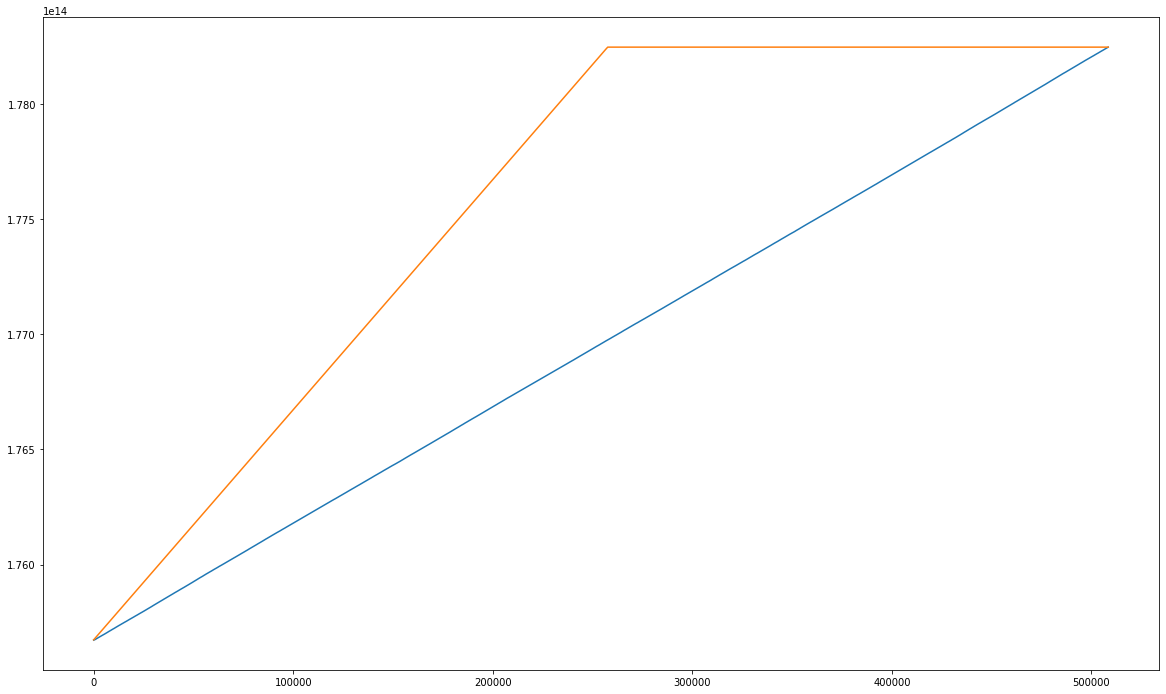

In [6]:
print(len(t_sensor), len(t_CS))
t_CS+=[t_CS[-1]]*(len(t_sensor)-len(t_CS))
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (20,12)

plt.plot(np.linspace(0, len(t_sensor), len(t_sensor)), t_sensor)
plt.plot(np.linspace(0, len(t_sensor), len(t_sensor)), t_CS)

In [8]:
angle = []
speed = []
torque_output = []
driver_torque = []

#Need sync
imu_v = []
imu_alpha = []

p_cars = 0
p_acc = 0
p_alpha = 0
for i in range(len(carState)-1):
    CS = carState[i]
    controls = controlsState[i]
    timeCS = CS["logMonoTime"]
#     print(timeCS, controls["logMonoTime"])
    while t_acc[p_acc] < timeCS:
        p_acc+=1
    while t_alpha[p_alpha] < timeCS:
        p_alpha+=1
    
    #CS, controls, sensors are matched
#     print(timeCS, controls["logMonoTime"], t_acc[p_acc], t_alpha[p_alpha])
    step = CS["carState"]
    angle.append(step["steeringAngleDeg"])
    speed.append(step["vEgo"])
    driver_torque.append(step["steeringTorque"])
    
    step = controls["controlsState"]
    torque_output.append(step["lateralControlState"]["pidState"]["output"])
    
    imu_v.append(acc[p_acc])
    imu_alpha.append(alpha[p_alpha])
#     print(step)
#     break
    

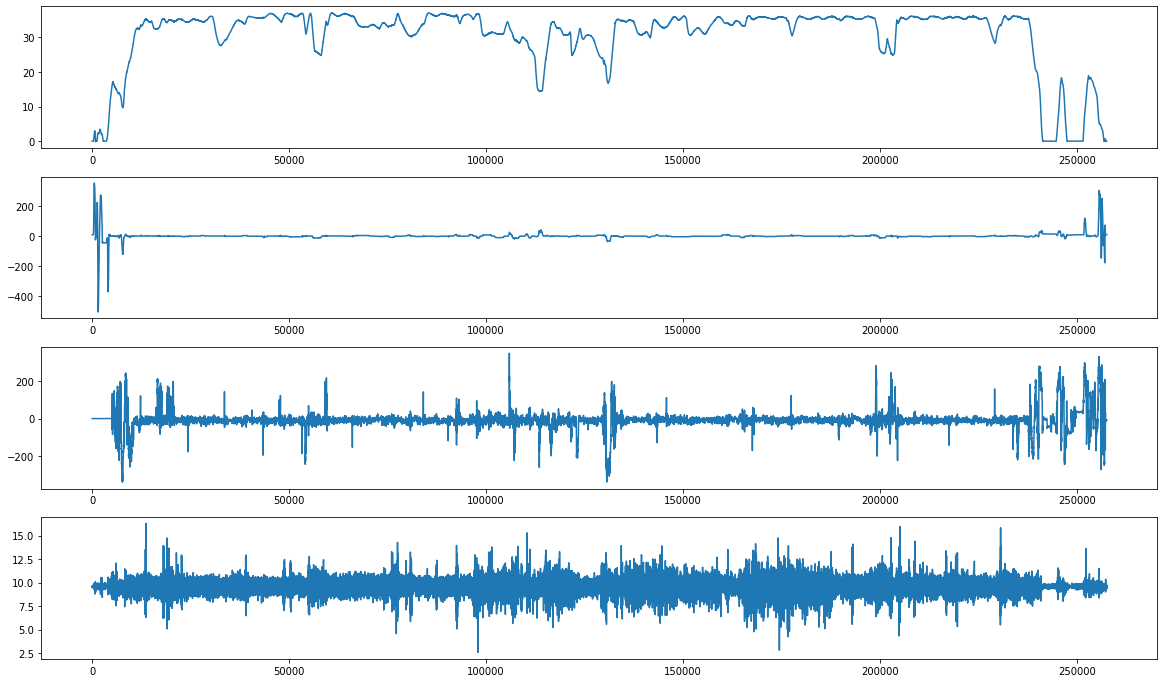

In [13]:
_, axs = plt.subplots(4)
time = len(carState)-1
axs[0].plot(np.linspace(0, time, time), speed)
axs[1].plot(np.linspace(0, time, time), angle)
axs[2].plot(np.linspace(0, time, time), [0]*5000 +driver_torque[5000:])
axs[3].plot(np.linspace(0, time, time), [imu_v[i][0] for i in range(len(imu_v))])

In [15]:
goodOutputs = []
time = len(angle)
curr = []
for i in range(time):
    ok = True
    if speed[i]<20:
        ok = False
    if abs(driver_torque[i]) > 50:
        ok = False
    if ok:
        curr.append([i, angle[i], speed[i], torque_output[i], imu_v[i][0], imu_v[i][1], imu_v[i][2], imu_alpha[i][0], imu_alpha[i][1], imu_alpha[i][2]])
    if not ok:
        if len(curr) > 30 * 100:
            goodOutputs.append(curr)
            print(i-len(curr), i, len(curr)//100)
        curr = []

12283 16218 39
20734 24247 35
24313 33571 92
33585 43415 98
43432 47476 40
48780 53319 45
54931 59150 42
59682 66040 63
66060 76736 106
76738 80790 40
80792 84060 32
84078 90353 62
93130 97607 44
100713 105888 51
107674 110901 32
118383 121517 31
125895 129608 37
134276 143395 91
145803 165071 192
168011 177449 94
177570 189477 119
189635 197440 78
204503 217477 129
217495 229060 115
229144 233751 46


In [17]:
import numpy as np
#Format:
# index, angle, speed, torque, IMU(speed_dot, angle_dot)*6
for i, output in enumerate(goodOutputs):
    np.savetxt(f"train_exports/{route_name}-{i}.csv", output, delimiter =" ", fmt ='% s')